In [9]:
import pymongo
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize
import folium
import pandas as pd

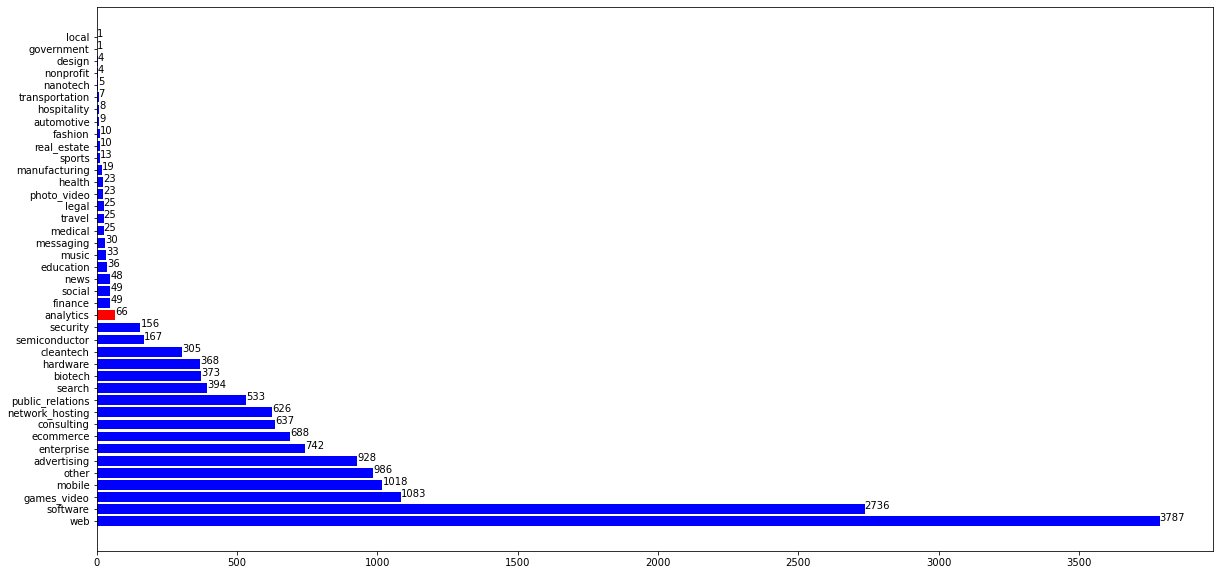

In [10]:
client = pymongo.MongoClient()

db = client.companies_database

collection = db.companies_collection

categories = pd.DataFrame(list(collection.find({},{'category_code':1,'_id':0})))

data = dict(categories['category_code'].value_counts())
colors = ['b']*len(list(data.keys()))
colors[17] = 'r'

plt.figure(figsize=(20,10))
plt.barh(tick_label=list(data.keys()),width=data.values(), y=list(range(0,len(list(data.keys())))),color = colors)

for index, value in enumerate(list(data.values())):
    plt.text(value, index, str(value))

In [11]:
data = list(collection.find({'category_code':'analytics'},{'_id':0,'name':1,'offices.latitude':1,'offices.longitude':1}))

df = pd.DataFrame(data)

lista = [json_normalize(office) for office in df['offices']]

nombres = list(df['name'])

data_zip = list(zip(nombres,lista))

for company in data_zip:
    company[1]['company'] = company[0]

data_clean = [j for i,j in data_zip]
data = pd.concat(data_clean)
data = data.loc[data['latitude'].notna()]

lat = data['latitude'].tolist()
lon = data['longitude'].tolist()
company_name = data['company'].tolist()

mapa = folium.Map(location=[19.41, -10], tiles='stamenterrain', zoom_start=2)

for i in range(len(lat)):
    folium.Marker([lat[i], lon[i]], icon=folium.Icon(color='red'),popup = f'<b>{company_name[i]}</b>').add_to(mapa)

mapa.save('companies_map.html')
mapa

<ipython-input-11-57f8ea8f6b96>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  lista = [json_normalize(office) for office in df['offices']]


In [12]:
mapa = folium.Map(location=[50, 10], tiles='stamenterrain', zoom_start=4)

for i in range(len(lat)):
    folium.Marker([lat[i], lon[i]], icon=folium.Icon(color='red'),popup = f'<b>{company_name[i]}</b>').add_to(mapa)

folium.Marker([52.520008,13.404954], icon=folium.Icon(color='blue')).add_to(mapa)
mapa.save('companies_map2.html')

mapa

In [13]:
mapa = folium.Map(location=[52.530008,13.404954], tiles='stamenterrain', zoom_start=14)

folium.CircleMarker([52.5303104,13.3819952],
                    radius = 80,
                    icon = folium.Icon(),
                    tooltip= 'Silicon Allee',
                    fill=True,
                    fill_color='red',
                    color = 'red',
                    fill_opacity=0.2).add_to(mapa)

mapa.save('companies_map3.html')
mapa